In [39]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import pathlib
import matplotlib.pyplot as plt

In [28]:
data_dir=pathlib.Path("C:\\Users\\Varun Gopal\\Documents\\Semester 4\\MLProject\\")

In [29]:
train_data_paths=list(data_dir.glob('train/*.jpg'))

In [31]:
print(len(train_data_paths))

11952


In [32]:
test_data_paths=list(data_dir.glob('test/*.jpg'))

In [33]:
print(len(test_data_paths))

985


In [34]:
validation_data_paths=list(data_dir.glob('valid/*.jpg'))

In [35]:
print(len(validation_data_paths))

1922


In [47]:
img=cv.imread(str(train_data_paths[2]))

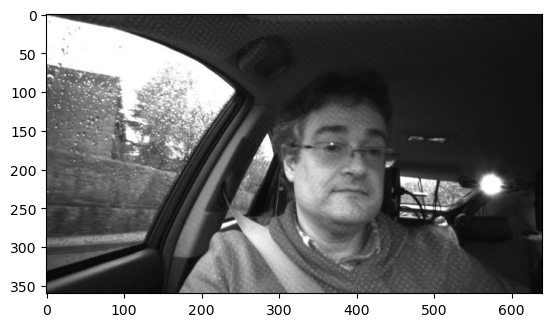

In [48]:
plt.imshow(img)
# Dimensions of the image
# n=200
# m=600
n=200
m=500
img=cv.resize(img,(m,n))

In [52]:
test_arr=[]
for path in test_data_paths:
    img=cv.imread(str(path))
    resize_img=cv.resize(img,(m,n))
    test_arr.append(resize_img)

In [56]:
train_arr=[]
for path in train_data_paths:
    img=cv.imread(str(path))
    resize_img=cv.resize(img,(m,n))
    train_arr.append(resize_img)

In [73]:
valid_arr=[]
for path in validation_data_paths:
    img=cv.imread(str(path))
    resize_img=cv.resize(img,(m,n))
    valid_arr.append(resize_img)

In [60]:
test_arr=np.array(test_arr)
print(test_arr.shape,type(test_arr))

(985, 200, 500, 3) <class 'numpy.ndarray'>


In [72]:
train_arr=np.array(train_arr)
print(train_arr.shape,type(train_arr))

(11952, 200, 500, 3) <class 'numpy.ndarray'>


In [74]:
valid_arr=np.array(valid_arr)
print(valid_arr.shape,type(valid_arr))

(1922, 200, 500, 3) <class 'numpy.ndarray'>


In [136]:
trainlfile=open(pathlib.Path(str(data_dir)+"\\train\\_annotations.txt"),"r")
train_labels=[]
dict_labels={}

for line in list(trainlfile.read().splitlines()):
    label=line.split(",")[-1]
    title=line.split(" ")[0]
    dict_labels[title]=label
    print(title,label)


gB_8_s1_2019-03-11T15-01-33-01-00_ir_face_mp4-293_jpg.rf.dbd9e3593fc6d02a80b387e5c7b760aa.jpg 3
gA_2_s1_ir_face_mp4-219_jpg.rf.dc3b3b5a1ff934c50da0a9fa950faffb.jpg 3
gA_3_s1_ir_face_mp4-237_jpg.rf.dbaee33cd769e1155aa9709683ecc288.jpg 2
gA_5_s2_ir_face_mp4-403_jpg.rf.dbaaf0a9f01069f144be6f77df56f1be.jpg 0
gB_8_s1_2019-03-11T15-01-33-01-00_ir_face_mp4-412_jpg.rf.dc2a785203d6a2a5a3cb72d720a7eaae.jpg 3
gA_4_s2_ir_face_mp4-325_jpg.rf.dc2f2c563fdc441a355c99cd8be62b46.jpg 3
gA_2_s2_ir_face_mp4-99_jpg.rf.dbc28232df6fc8097a346bb346e0a52f.jpg 0
gA_1_s2_ir_face_mp4-254_jpg.rf.dbf504275f2d8e6b42e0eac5d5e6cf2e.jpg 3
gB_8_s1_2019-03-11T15-01-33-01-00_ir_face_mp4-201_jpg.rf.dc395c0c8fe1d3a10882a1dc5d11a6e1.jpg 3
gA_2_s1_ir_face_mp4-48_jpg.rf.dc098ddad1fc16387fc30a1c638fed34.jpg 3
gA_4_s2_ir_face_mp4-386_jpg.rf.dc1321c6e4c6dab620993c7716da3ffa.jpg 0
gB_9_s2_2019-03-07T16-21-20-01-00_ir_face_mp4-589_jpg.rf.dc1e2f78657f08d4020b4fa21cd92827.jpg 1
gA_5_s2_ir_face_mp4-312_jpg.rf.dc3ca573a7448cb5e694a8fbba0

In [137]:
for path in train_data_paths:
    path=str(path)
    filename=path.split('\\')[-1]
    print(filename)
    if(len(dict_labels[filename])>=2):
        dict_labels[filename]=3
    train_labels.append(dict_labels[filename])

gA_1_s1_ir_face_mp4-100_jpg.rf.497446994db112794829f1a9d3af9b2a.jpg
gA_1_s1_ir_face_mp4-101_jpg.rf.2ad82d44f255712a8700b29f87d6a689.jpg
gA_1_s1_ir_face_mp4-101_jpg.rf.b53114d6b1f83d1c318e8280c59e7f9c.jpg
gA_1_s1_ir_face_mp4-102_jpg.rf.9a0709b2e31866b07efde8c92459714d.jpg
gA_1_s1_ir_face_mp4-103_jpg.rf.201b933b25ef8736a3cd351daf61b263.jpg
gA_1_s1_ir_face_mp4-103_jpg.rf.75c27d26ca9fb7c525b82152cb2f38fd.jpg
gA_1_s1_ir_face_mp4-105_jpg.rf.08b5aefdf8b993ece8cff919d218444d.jpg
gA_1_s1_ir_face_mp4-105_jpg.rf.8ba961cf141e9fc599deed3024ce2191.jpg
gA_1_s1_ir_face_mp4-106_jpg.rf.566cbe244d6e7f8c0ed23ba56da2a82c.jpg
gA_1_s1_ir_face_mp4-106_jpg.rf.cc3946c013809fea1cd4deaa1e694409.jpg
gA_1_s1_ir_face_mp4-107_jpg.rf.eb4b9f83cac05fb2cb340662772ba33f.jpg
gA_1_s1_ir_face_mp4-111_jpg.rf.dad90ab30e687943e38456edb7588868.jpg
gA_1_s1_ir_face_mp4-111_jpg.rf.fdbfac2768f0ee858fe13b15c2338c5d.jpg
gA_1_s1_ir_face_mp4-113_jpg.rf.43dd6ce7102ec554aa62f3d4ab4d11b5.jpg
gA_1_s1_ir_face_mp4-113_jpg.rf.eabbe35433e8dbc91

In [139]:
train_labels=np.reshape(train_labels,(len(train_labels),1))

In [144]:
train_labels
f=open("imf.txt","w+")

In [146]:
for i in train_labels:
    f.write(i[0]+"\n")

In [155]:
train_labels=train_labels.astype('int')

In [158]:
model=keras.Sequential([
    keras.layers.Conv2D(100,3,input_shape=(200,500,3),padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(50,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(25,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(6,activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_arr,train_labels,epochs=10)

Epoch 1/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.5541 - loss: 3.8849
Epoch 2/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.7946 - loss: 0.5733
Epoch 3/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.8454 - loss: 0.4292
Epoch 4/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.8719 - loss: 0.3566
Epoch 5/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.8881 - loss: 0.2978
Epoch 6/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.8943 - loss: 0.2729
Epoch 7/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.9051 - loss: 0.2529
Epoch 8/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.9062 - loss: 0.2400
Epoch 9/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.9115 - loss: 0.2180
Epoch 10/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.9279 - loss: 0.2087


In [189]:
model1_weights=np.array(model.get_weights())

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [191]:
type(model.get_weights())

list

In [211]:
import pickle

pathsva="model1_weightfffs.pkl"
# Save the list to a file
# with open(pathsva, "wb") as file:
#     pickle.dump(model.get_weights(), file)
# file.close()

# Load the list from the file
with open(pathsva, "rb") as file:
    loaded_list = pickle.load(file)

print(loaded_list) 

[array([[[[ 1.79788731e-02, -7.94620588e-02, -1.88335598e-01, ...,
           6.04873374e-02, -2.09821463e-02,  6.68689981e-02],
         [-8.22805241e-03, -9.76586118e-02, -1.65627211e-01, ...,
           1.45102078e-02,  3.08006827e-04,  3.36552458e-03],
         [ 8.96734744e-03,  2.33897958e-02, -6.13542907e-02, ...,
           6.71049301e-03,  8.17584097e-02, -6.10030964e-02]],

        [[ 6.06885664e-02,  6.49296716e-02, -7.22705796e-02, ...,
           6.96170777e-02, -5.51045686e-02, -3.26229422e-03],
         [ 3.49687040e-02,  3.61980492e-04, -7.74996448e-03, ...,
          -6.34598956e-02,  8.90209451e-02, -3.39074148e-04],
         [ 1.48581546e-02, -9.06830505e-02, -4.44884375e-02, ...,
           5.29196719e-03, -3.53835300e-02, -3.15747857e-02]],

        [[-1.15015563e-02,  8.02308619e-02, -6.01763315e-02, ...,
          -4.35340509e-04,  3.62834670e-02, -1.50799245e-01],
         [-5.95020577e-02,  4.41059358e-02, -1.59544155e-01, ...,
          -1.59818679e-02,  2.276

In [197]:
model2=keras.Sequential([
    keras.layers.Conv2D(100,3,input_shape=(200,500,3),padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(50,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(25,3,padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(6,activation='softmax'),
])

C:\Users\Varun Gopal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [204]:
model2.set_weights(loaded_list)
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [205]:
model2.evaluate(train_arr,train_labels)

374/374 ━━━━━━━━━━━━━━━━━━━━ 187s 490ms/step - accuracy: 0.9450 - loss: 0.1489


[0.1614050269126892, 0.9448627829551697]